#Name : Aryan Patole
#Oasis Infobyte : Data Science 
#Internship Task 4 : Email Spam Detection  

#IMPORTING LIBRARIES

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#LOADING THE DATASET

In [29]:
df=pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [30]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


#ANALIZING THE DATASET

In [32]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [33]:
df.shape 

(5572, 5)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [35]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [36]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

#VISUALIZING THE DATASET

<Axes: xlabel='v1', ylabel='count'>

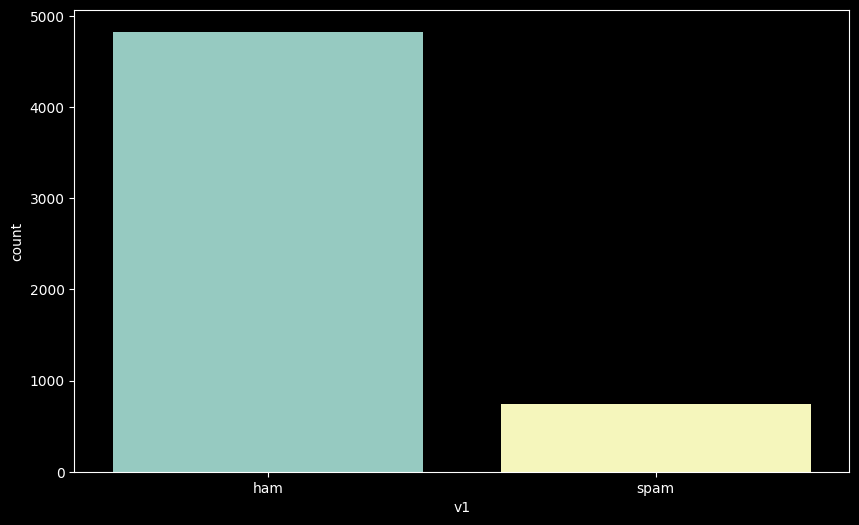

In [37]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
sns.countplot(x=df['v1'])

#CHANGING THE COLUMN NAMES

In [38]:
df.rename(columns={'v1':'message_type','v2':'message'},inplace=True)

In [39]:
df.head()

,message_type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#MODEL BUILDING

In [13]:
df.loc[df['message_type'] == 'spam', 'message_type',] = 0
df.loc[df['message_type'] == 'ham', 'message_type',] = 1

In [15]:
X = df['message']
Y = df['message_type']

In [16]:
print(X)
print('''''''')
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: message_type, Length: 5572, dtype: object


#MODEL TRAINING

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=3)

In [19]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [20]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [21]:
model = LinearSVC()
model.fit(X_train_features, Y_train)

LinearSVC()

In [22]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [23]:
print('Accuracy on training data : ',accuracy_on_training_data)

Accuracy on training data :  0.9995512676688355


#PREDICTING THE EMAIL

In [24]:
input_mail = ["Even my brother is not like to speak with me. They treat me like aids patent.,,,"]
input_mail_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_mail_features)
print(prediction)              
if (prediction[0] == 1):
              print("HAM MAIL")
else :
              print("SPAM MAIL")

[1]
HAM MAIL


In [26]:
input_mail = ["Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML"]
input_mail_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_mail_features)
print(prediction)              
if (prediction[0] == 1):
              print("HAM MAIL")
else :
              print("SPAM MAIL")

[0]
SPAM MAIL


#THANK YOU